# For apple bugs images

In [6]:
cd E:\awalsabudh\apple

E:\awalsabudh\apple


# Import libraries

In [2]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [45]:
cwd=os.getcwd()

# Load data

In [46]:
classes=[ name for name in os.listdir(cwd) if os.path.isdir(os.path.join(cwd, name)) ]

In [5]:
len(classes)

11

In [6]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [26]:
#apple_bugs={}
label=[]
image=[]
for i in classes:
    images=load_images_from_folder(cwd+"\\"+i)
    for j in images:
        #apple_bugs[j]=i
        label.append(i)
        image.append(j)

In [30]:
len(label),len(image)

(377, 377)

In [31]:
# Loading data into a dataframe
df = pd.DataFrame()
df['Image'] = image
df['Class'] = label
df.head()

,Image,Class
0,"[[[210, 220, 197], [207, 217, 194], [206, 216,...",Anthocorid bug
1,"[[[32, 77, 0], [34, 79, 0], [36, 81, 2], [37, ...",Anthocorid bug
2,"[[[222, 216, 221], [225, 219, 224], [229, 223,...",Anthocorid bug
3,"[[[22, 28, 23], [22, 28, 23], [23, 29, 24], [2...",Anthocorid bug
4,"[[[219, 218, 220], [221, 220, 222], [224, 223,...",Anthocorid bug


In [53]:
df.tail()

,Image,Class
372,"[[[88, 146, 165], [89, 147, 166], [90, 149, 16...",Telenomus sp
373,"[[[223, 211, 207], [223, 211, 207], [223, 211,...",Telenomus sp
374,"[[[76, 140, 134], [77, 141, 135], [78, 142, 13...",Telenomus sp
375,"[[[140, 148, 141], [140, 148, 141], [143, 151,...",Telenomus sp
376,"[[[241, 241, 241], [241, 241, 241], [241, 241,...",Telenomus sp


Images of apple bug: Aphelinus mali, Shape: (400, 600, 3) 


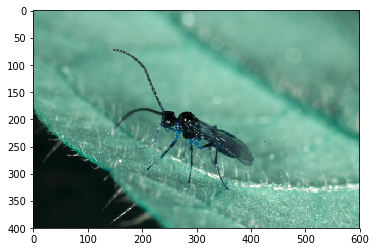

Images of apple bug: Aphytis sp, Shape: (540, 720, 3) 


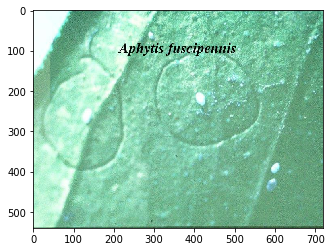

Images of apple bug: Aphytis sp, Shape: (480, 480, 3) 


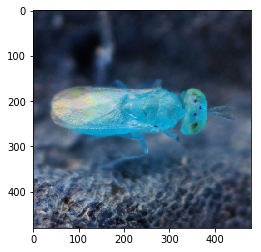

Images of apple bug: Aphytis sp, Shape: (180, 320, 3) 


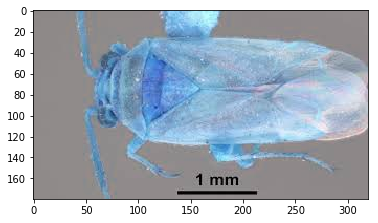

Images of apple bug: Aphytis sp, Shape: (1999, 2687, 3) 


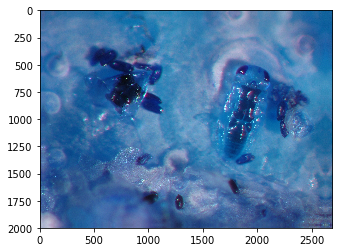

In [52]:
# Plotting some random images.
for i in range(5):
    n=random.randint(1,100)
    print(f"Images of apple bug: {df['Class'].iloc[n]}, Shape: {df['Image'].iloc[n].shape} " )
    plt.imshow(df['Image'].iloc[n])
    plt.show()

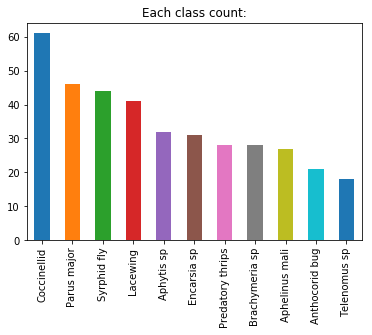

In [62]:
plt.title("Each class count:")
df['Class'].value_counts().plot.bar()

# Data Augmentation

In [63]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.imagenet_utils import preprocess_input as zero_mean

Using TensorFlow backend.


In [80]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [89]:
for _ in range(5,len(classes)):
    folder=cwd+"\\"+classes[_]

    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            x = img_to_array(img) 
            x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=10,save_to_dir=classes[_], save_format='jpg'):
            i += 1
            if i > 20:
                break  # otherwise the generator would loop indefinitely

# RUN FROM HERE :

# Load Augmented data

In [47]:
#label=[]   
#image=[]
#for i in classes:
#    images=load_images_from_folder(cwd+"\\"+i)
#    for j in images:
#        #apple_bugs[j]=i
#        label.append(i)
#        image.append(j)

In [48]:
qq=os.listdir(cwd)[:-1]
data=[]
for i in qq:
    pp=os.path.join(cwd,i)
    dd=os.listdir(pp)
    for j in dd:
        data.append(os.path.join(pp,j))

In [49]:
df=pd.DataFrame()
df['Images']=data

In [50]:
new = df["Images"].str.split("\\", n = 4, expand = True) 

In [51]:
len(new[3])

8276

In [52]:
df["Label"]= new[3] 

In [53]:
df.head(),df.tail()

(                                              Images           Label
 0     E:\awalsabudh\apple\Anthocorid bug\0014233.jpg  Anthocorid bug
 1  E:\awalsabudh\apple\Anthocorid bug\11373_origi...  Anthocorid bug
 2    E:\awalsabudh\apple\Anthocorid bug\13722976.jpg  Anthocorid bug
 3     E:\awalsabudh\apple\Anthocorid bug\1857072.jpg  Anthocorid bug
 4  E:\awalsabudh\apple\Anthocorid bug\3923505335_...  Anthocorid bug,
                                            Images        Label
 8271  E:\awalsabudh\apple\Syrphid fly\_0_9937.jpg  Syrphid fly
 8272  E:\awalsabudh\apple\Syrphid fly\_0_9951.jpg  Syrphid fly
 8273  E:\awalsabudh\apple\Syrphid fly\_0_9964.jpg  Syrphid fly
 8274  E:\awalsabudh\apple\Syrphid fly\_0_9971.jpg  Syrphid fly
 8275  E:\awalsabudh\apple\Syrphid fly\_0_9987.jpg  Syrphid fly)

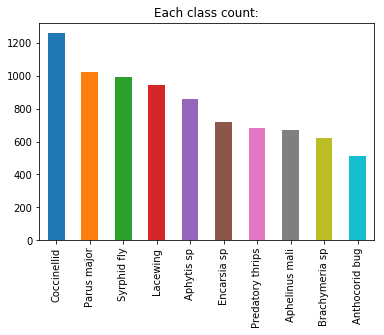

In [54]:
plt.title("Each class count:")
df['Label'].value_counts().plot.bar()

In [55]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [56]:
df.head()

,Images,Label
0,E:\awalsabudh\apple\Coccinellid\_0_5869.jpg,Coccinellid
1,E:\awalsabudh\apple\Syrphid fly\_0_4291.jpg,Syrphid fly
2,E:\awalsabudh\apple\Aphytis sp\_0_7734.jpg,Aphytis sp
3,E:\awalsabudh\apple\Encarsia sp\_0_772.jpg,Encarsia sp
4,E:\awalsabudh\apple\Lacewing\_0_647.jpg,Lacewing


In [57]:
# store to csv 

# Transfer learning

In [58]:
# importing required libraries

from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions


from scipy.misc import imresize

In [59]:
#train=pd.read_csv("R/Data/Train/train.csv")
#test=pd.read_csv("R/Data/test.csv")
#train_path="R/Data/Train/Images/train/"
#test_path="R/Data/Train/Images/test/"

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,stratify=df['Label'])

In [60]:
# preparing the train dataset

train_img=[]
for i in train['Images']:
    if i is not None:
        temp_img=image.load_img(i,target_size=(224,224))
        temp_img=image.img_to_array(temp_img)
        train_img.append(temp_img)

In [61]:
#converting train images to array and applying mean subtraction processing

train_img=np.array(train_img) 
train_img=preprocess_input(train_img)


In [62]:
# applying the same procedure with the test dataset

test_img=[]
for i in test['Images']:
    if i is not None:
        temp_img=image.load_img(i,target_size=(224,224))
        temp_img=image.img_to_array(temp_img)
        test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)


In [63]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_train=model.predict(train_img)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_test=model.predict(test_img)



Instructions for updating:
Colocations handled automatically by placer.


ValueError: cannot reshape array of size 166082560 into shape (49000,25088)

In [69]:
# flattening the layers to conform to MLP input

train_x=features_train.reshape(6620,-1)
# converting target variable to array

train_y=np.asarray(train['Label'])
# performing one-hot encoding for the target variable

train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
# creating training and validation set

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)


In [70]:
test_x=features_test.reshape(1656,-1)

In [66]:
features_test.shape

(1656, 7, 7, 512)

In [71]:
# creating a mlp model
from keras.layers import Dense, Activation
model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

op_classes=len(df['Label'].value_counts())
model.add(Dense(units=op_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])



In [72]:
# fitting the model 

model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 4634 samples, validate on 1986 samples
Epoch 1/20
4634/4634 [==============================] - 17s 4ms/step - loss: 2.0957 - acc: 0.2810 - val_loss: 1.8384 - val_acc: 0.3917
Epoch 2/20
4634/4634 [==============================] - 16s 3ms/step - loss: 1.5757 - acc: 0.5073 - val_loss: 1.3642 - val_acc: 0.6133
Epoch 3/20
4634/4634 [==============================] - 16s 3ms/step - loss: 1.0988 - acc: 0.7000 - val_loss: 1.0144 - val_acc: 0.6979
Epoch 4/20
4634/4634 [==============================] - 15s 3ms/step - loss: 0.6851 - acc: 0.8325 - val_loss: 0.7258 - val_acc: 0.7875
Epoch 5/20
4634/4634 [==============================] - 15s 3ms/step - loss: 0.3721 - acc: 0.9329 - val_loss: 0.4858 - val_acc: 0.8686
Epoch 6/20
4634/4634 [==============================] - 15s 3ms/step - loss: 0.1594 - acc: 0.9793 - val_loss: 0.3417 - val_acc: 0.8988
Epoch 7/20
4634/4634 [==============================] - 15s 3ms/step - loss: 0.0639 - acc: 0.9

In [73]:
model.evaluate(X_valid,Y_valid)

1986/1986 [==============================] - 1s 672us/step


[0.19495870519808353, 0.9451158106747231]

In [75]:
test_y=np.asarray(test['Label'])

test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)

In [76]:
scores=model.evaluate(test_x,test_y)

1656/1656 [==============================] - 1s 664us/step


In [78]:
scores[1]

0.933574878939108